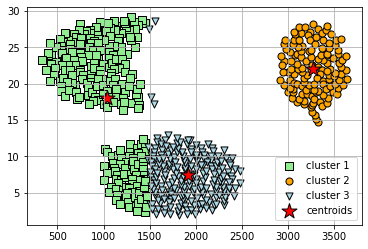

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv('cluster.dat', sep = ' ', header = None).values

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [2]:
print(len(y_km))

573


In [2]:
import pandas as pd
from math import floor, ceil

def Dados_2(caminho, dataset = 'training', norm = True):
    X = pd.read_csv(caminho, sep = '\s+|,', engine = 'python')
    del X['Date']
     
    if(norm):
        X = (X-X.min())/(X.max()-X.min()) # Min-Max
        
    training, test = [], []
    Total = len(X)
    
    for i in range(5):
        training.append(X.head(floor(Total*0.18)))
        X = X.iloc[floor(Total*0.18):]
        test.append(X.head(ceil(Total*0.02)))
        X = X.iloc[ceil(Total*0.02):]
    
    training = pd.concat(training)
    test = pd.concat(test)
    if(dataset == 'training'):
        return training.values
    elif(dataset == 'test'):
        return test.values

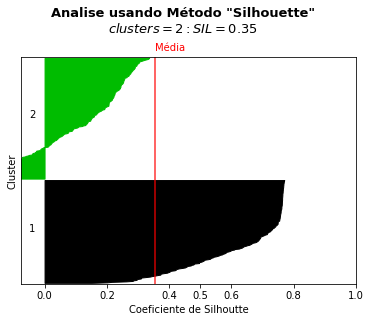

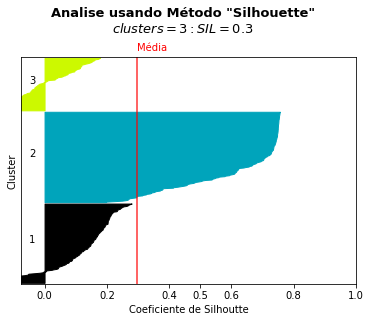

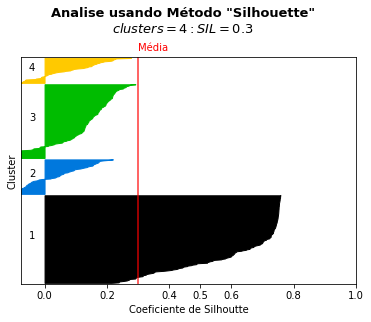

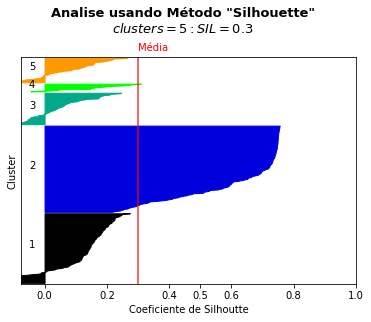

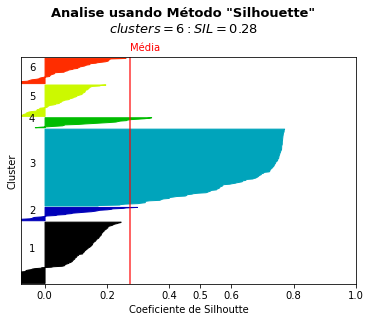

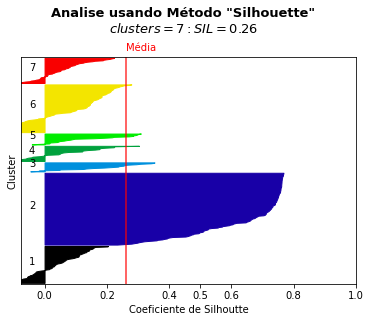

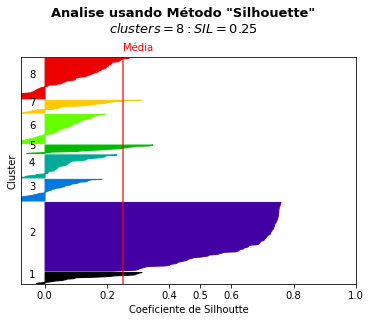

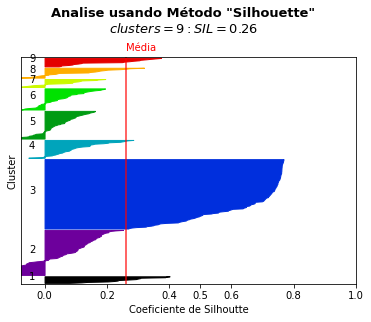

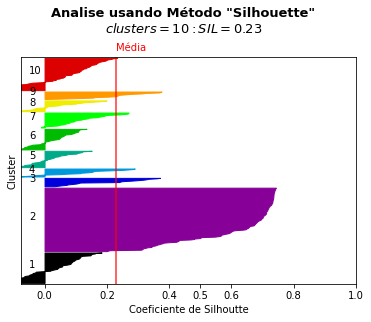

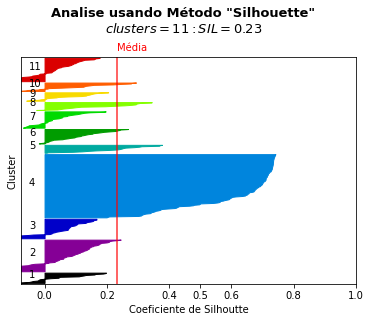

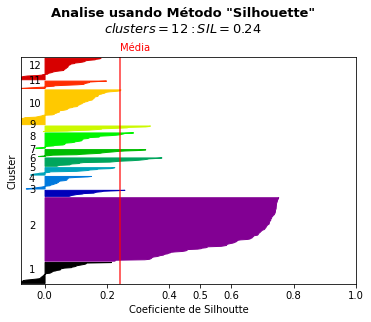

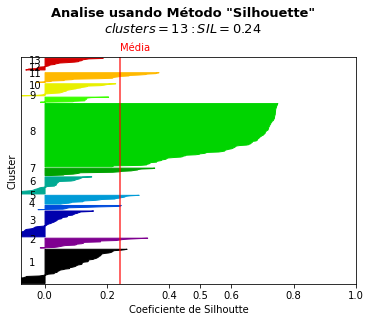

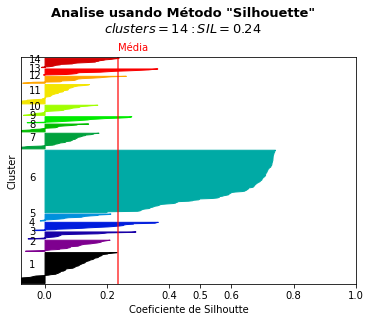

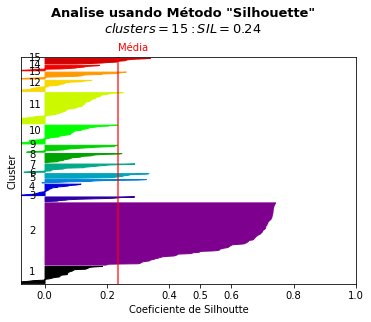

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import colorConverter

def silhouette_plot(X, y, n_clusters, ax):
    from sklearn.metrics import silhouette_samples, silhouette_score

     # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("Coeficiente de Silhoutte")
    ax.set_ylabel("Cluster")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, ls='-')
    ax.annotate('Média', xytext=(silhouette_avg, y_lower * 1.025), xy=(0, 0), c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4,0.5, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax

for k in range(2, 16):
    newDataTrainingSet = Dados_2('hungary_chickenpox.csv', dataset = 'training', norm = True)
    newDataTrainingSet = newDataTrainingSet[:, 2:20]
    
    clusterer = KMeans(n_clusters=k, random_state=10)
    y = clusterer.fit_predict(newDataTrainingSet)

    fig, ax1 = plt.subplots(1,figsize=(6,4.5))
    ax1 = silhouette_plot(newDataTrainingSet, y, k, ax=ax1)
    
    fig.subplots_adjust(top=0.825)
    fig.suptitle(("Analise usando Método \"Silhouette\""
                  "\n$clusters={}: SIL= {}$".format(k, round(silhouette_score(newDataTrainingSet, y), 2))),
                 fontsize=13, fontweight='bold')

In [47]:
newDataTrainingSet = Dados_2('pop_failures.dat', dataset = 'training', norm = True)
newDataTrainingSet = newDataTrainingSet[:, 2:20]
print(len(newDataTrainingSet[0]))
print(newDataTrainingSet)

18
[[0.85967133 0.92878845 0.25242116 ... 0.86054002 0.79750634 0.87015912]
 [0.60636702 0.457227   0.35931591 ... 0.35697716 0.43862848 0.51230479]
 [0.99840421 0.37247378 0.51772913 ... 0.25066061 0.28567711 0.36581761]
 ...
 [0.41166752 0.24365283 0.00846693 ... 0.75893151 0.36162701 0.67788566]
 [0.08366009 0.7018911  0.41353268 ... 0.47955311 0.52412042 0.35533005]
 [0.29802537 0.42684782 0.67565093 ... 0.29892598 0.42847141 0.38227212]]


In [ ]:
print()